In [3]:
!pip install akiFlagger

# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from akiFlagger import AKIFlagger
import matplotlib.transforms as mtransforms

def makePatientDataFrame(creatIn, timeIn):
  assert len(creatIn) == len(timeIn)
  creat = np.array(creatIn).astype('float')
  time = np.array([pd.Timestamp('01-01-2020 12:00') + pd.Timedelta(days=tp) for tp in timeIn])
  mrn = np.ones(creat.shape[0])
  inp = np.array(timeIn) >= 0
  
  df = pd.DataFrame()
  df['patient_id'] = mrn
  df['inpatient'] = inp
  df['admission'] = pd.Timestamp('01-01-2020 12:00')
  df['time'] = time
  df['creatinine'] = creat

  return df

inpatient           admission  creatinine  aki
patient_id time                                                               
1.0        2019-12-24 12:00:00      False 2020-01-01 12:00:00         1.0    0
           2019-12-25 12:00:00      False 2020-01-01 12:00:00         1.0    0
           2019-12-30 12:00:00      False 2020-01-01 12:00:00         1.0    0
           2020-01-01 12:00:00       True 2020-01-01 12:00:00         1.0    0
           2020-01-03 12:00:00       True 2020-01-01 12:00:00         1.3    1
           2020-01-11 12:00:00       True 2020-01-01 12:00:00         1.3    0

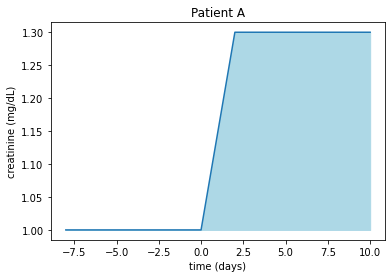

In [4]:
# Vanilla case:

fig, ax = plt.subplots()
creat = [1, 1, 1, 1, 1.3, 1.3]
time =  [-8, -7, -2, 0, 2, 10]

ax.plot(time, creat)
ax.set_xlabel('time (days)')
ax.set_ylabel('creatinine (mg/dL)')
ax.set_title('Patient A')
ax.fill_between(time, creat, 1, color='lightblue')
# RW and HB both flag as AKI

HB_trumping = True
aki = AKIFlagger(HB_trumping=HB_trumping).returnAKIpatients(makePatientDataFrame(creat, time))
#aki = aki.drop('imputed_encounter_id', axis=1) if HB_trumping else aki
aki

In [3]:
aki

inpatient           admission  creatinine  aki
patient_id time                                                               
1.0        2019-12-24 12:00:00      False 2020-01-01 12:00:00         1.0    0
           2019-12-25 12:00:00      False 2020-01-01 12:00:00         1.0    0
           2019-12-30 12:00:00      False 2020-01-01 12:00:00         1.0    0
           2020-01-01 12:00:00       True 2020-01-01 12:00:00         1.0    0
           2020-01-03 12:00:00       True 2020-01-01 12:00:00         1.3    1
           2020-01-11 12:00:00       True 2020-01-01 12:00:00         1.3    0

inpatient           admission  creatinine  aki
patient_id time                                                               
1.0        2019-12-24 12:00:00      False 2020-01-01 12:00:00         1.1    0
           2019-12-29 12:00:00      False 2020-01-01 12:00:00         1.1    0
           2019-12-30 12:00:00      False 2020-01-01 12:00:00         1.0    0
           2020-01-01 12:00:00       True 2020-01-01 12:00:00         1.0    0
           2020-01-03 12:00:00       True 2020-01-01 12:00:00         1.3    0
           2020-01-11 12:00:00       True 2020-01-01 12:00:00         1.3    0

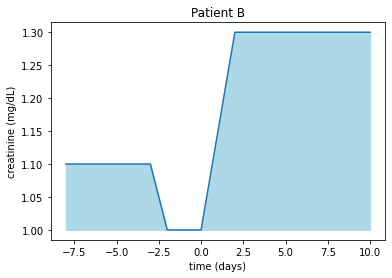

In [5]:
# Rolling minimum: YES
# Historical baseline: NO

fig, ax = plt.subplots()
creat = [1.1, 1.1, 1, 1, 1.3, 1.3]
time =  [-8, -3, -2, 0, 2, 10]
ax.plot(time, creat)
ax.set_xlabel('time (days)')
ax.set_ylabel('creatinine (mg/dL)')
ax.set_title('Patient B')
ax.fill_between(time, creat, 1, color='lightblue')
# RW flags; HB doesn't

HB_trumping = True
aki = AKIFlagger(HB_trumping=HB_trumping).returnAKIpatients(makePatientDataFrame(creat, time))
#aki = aki.drop('imputed_encounter_id', axis=1) if HB_trumping else aki
aki

In [6]:
aki

inpatient           admission  creatinine  aki
patient_id time                                                               
1.0        2019-12-24 12:00:00      False 2020-01-01 12:00:00         1.1    0
           2019-12-29 12:00:00      False 2020-01-01 12:00:00         1.1    0
           2019-12-30 12:00:00      False 2020-01-01 12:00:00         1.0    0
           2020-01-01 12:00:00       True 2020-01-01 12:00:00         1.0    0
           2020-01-03 12:00:00       True 2020-01-01 12:00:00         1.3    0
           2020-01-11 12:00:00       True 2020-01-01 12:00:00         1.3    0

inpatient           admission  creatinine  aki
patient_id time                                                               
1.0        2019-12-24 12:00:00      False 2020-01-01 12:00:00         1.0    0
           2019-12-25 12:00:00      False 2020-01-01 12:00:00         1.0    0
           2019-12-30 12:00:00      False 2020-01-01 12:00:00         1.1    0
           2020-01-01 12:00:00       True 2020-01-01 12:00:00         1.1    0
           2020-01-03 12:00:00       True 2020-01-01 12:00:00         1.3    0
           2020-01-05 12:00:00       True 2020-01-01 12:00:00         1.3    0
           2020-01-06 12:00:00       True 2020-01-01 12:00:00         1.3    0
           2020-01-07 12:00:00       True 2020-01-01 12:00:00         1.5    0
           2020-01-11 12:00:00       True 2020-01-01 12:00:00         1.5    0

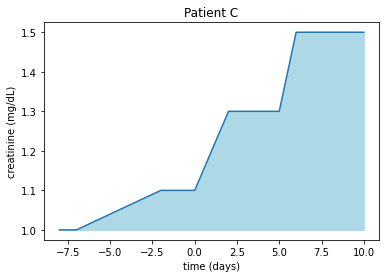

In [7]:
# Rolling minimum: NO
# Historical baseline: YES

fig, ax = plt.subplots()
creat = [1, 1, 1.1, 1.1, 1.3, 1.3, 1.3, 1.5, 1.5]
time =  [-8, -7, -2, 0, 2, 4, 5, 6, 10]
ax.plot(time, creat)
ax.set_xlabel('time (days)')
ax.set_ylabel('creatinine (mg/dL)')
ax.set_title('Patient C')
ax.fill_between(time, creat, 1, color='lightblue')
# HB flags, RW doesn't

HB_trumping = False
aki = AKIFlagger(HB_trumping=HB_trumping).returnAKIpatients(makePatientDataFrame(creat, time))
aki

In [8]:
aki

inpatient           admission  creatinine  aki
patient_id time                                                               
1.0        2019-12-24 12:00:00      False 2020-01-01 12:00:00         1.0    0
           2019-12-25 12:00:00      False 2020-01-01 12:00:00         1.0    0
           2019-12-30 12:00:00      False 2020-01-01 12:00:00         1.1    0
           2020-01-01 12:00:00       True 2020-01-01 12:00:00         1.1    0
           2020-01-03 12:00:00       True 2020-01-01 12:00:00         1.3    0
           2020-01-05 12:00:00       True 2020-01-01 12:00:00         1.3    0
           2020-01-06 12:00:00       True 2020-01-01 12:00:00         1.3    0
           2020-01-07 12:00:00       True 2020-01-01 12:00:00         1.5    0
           2020-01-11 12:00:00       True 2020-01-01 12:00:00         1.5    0

inpatient           admission  creatinine  aki
patient_id time                                                               
1.0        2019-12-24 12:00:00      False 2020-01-01 12:00:00    2.000000    0
           2019-12-25 12:00:00      False 2020-01-01 12:00:00    2.000000    0
           2019-12-30 12:00:00      False 2020-01-01 12:00:00    1.000000    0
           2020-01-01 12:00:00       True 2020-01-01 12:00:00    1.000000    0
           2020-01-02 00:00:00       True 2020-01-01 12:00:00    1.000000    0
           2020-01-02 12:00:00       True 2020-01-01 12:00:00    1.333333    0
           2020-01-06 12:00:00       True 2020-01-01 12:00:00    1.333333    0
           2020-01-07 12:00:00       True 2020-01-01 12:00:00    1.666667    0
           2020-01-11 12:00:00       True 2020-01-01 12:00:00    1.666667    0

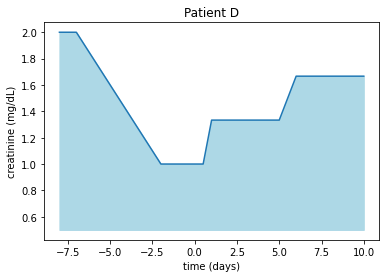

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
creat = [2, 2, 1, 1, 1, 4/3, 4/3, 5/3, 5/3]
time = [-8, -7, -2, 0, 0.5, 1, 5, 6, 10]
ax.plot(time, creat)
ax.set_xlabel('time (days)')
ax.set_ylabel('creatinine (mg/dL)')
ax.set_title('Patient C')
ax.fill_between(time, creat, 0.5, color='lightblue')
plt.title('Patient D')

HB_trumping = True
aki = AKIFlagger(HB_trumping=HB_trumping).returnAKIpatients(makePatientDataFrame(creat, time))
aki

In [10]:
aki

inpatient           admission  creatinine  aki
patient_id time                                                               
1.0        2019-12-24 12:00:00      False 2020-01-01 12:00:00    2.000000    0
           2019-12-25 12:00:00      False 2020-01-01 12:00:00    2.000000    0
           2019-12-30 12:00:00      False 2020-01-01 12:00:00    1.000000    0
           2020-01-01 12:00:00       True 2020-01-01 12:00:00    1.000000    0
           2020-01-02 00:00:00       True 2020-01-01 12:00:00    1.000000    0
           2020-01-02 12:00:00       True 2020-01-01 12:00:00    1.333333    0
           2020-01-06 12:00:00       True 2020-01-01 12:00:00    1.333333    0
           2020-01-07 12:00:00       True 2020-01-01 12:00:00    1.666667    0
           2020-01-11 12:00:00       True 2020-01-01 12:00:00    1.666667    0

In [30]:
import numpy as op
# Define creatinine values

creats = op.array([[1, 1, 1, 1, 1.3, 1.3], # A
                   [1.1, 1.1, 1, 1, 1.3, 1.3], # B
                   [1, 1, 1.1, 1.1, 1.3, 1.3, 1.3, 1.5, 1.5], # C
                   [2, 2, 1, 1, 1, 4/3, 4/3, 5/3, 5/3]]) # D

times = op.array([[-8, -7, -2, 0, 2, 10], # A
                  [-8, -3, -2, 0, 2, 10], # B
                  [-8, -7, -2, 0, 2, 4, 5, 6, 10], # C
                  [-8, -7, -2, 0, 0.5, 1, 5, 6, 10]]) # D

dummypatients = dict()
letters = ['A', 'B', 'C', 'D']

for indx, pat in enumerate(letters):
  dummypatients[pat] = np.array([times[indx], creats[indx]])#dummypatients[pat] = 

dummypatients

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if sys.path[0] == '':


{'A': array([[-8. , -7. , -2. ,  0. ,  2. , 10. ],
        [ 1. ,  1. ,  1. ,  1. ,  1.3,  1.3]]),
 'B': array([[-8. , -3. , -2. ,  0. ,  2. , 10. ],
        [ 1.1,  1.1,  1. ,  1. ,  1.3,  1.3]]),
 'C': array([[-8. , -7. , -2. ,  0. ,  2. ,  4. ,  5. ,  6. , 10. ],
        [ 1. ,  1. ,  1.1,  1.1,  1.3,  1.3,  1.3,  1.5,  1.5]]),
 'D': array([[-8.        , -7.        , -2.        ,  0.        ,  0.5       ,
          1.        ,  5.        ,  6.        , 10.        ],
        [ 2.        ,  2.        ,  1.        ,  1.        ,  1.        ,
          1.33333333,  1.33333333,  1.66666667,  1.66666667]])}

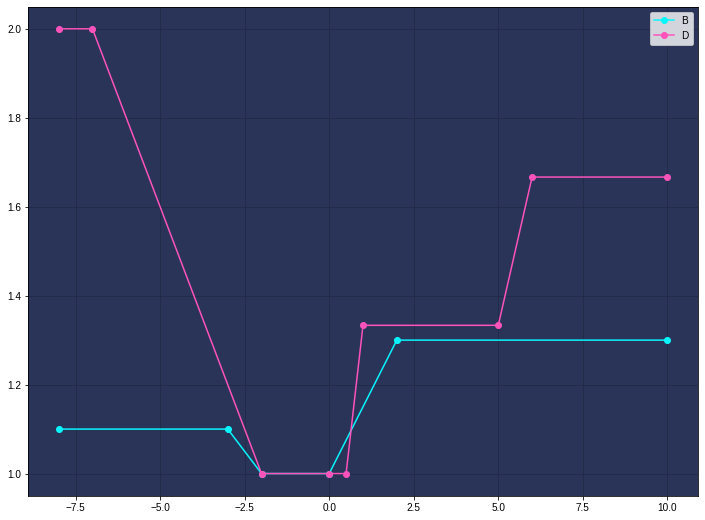

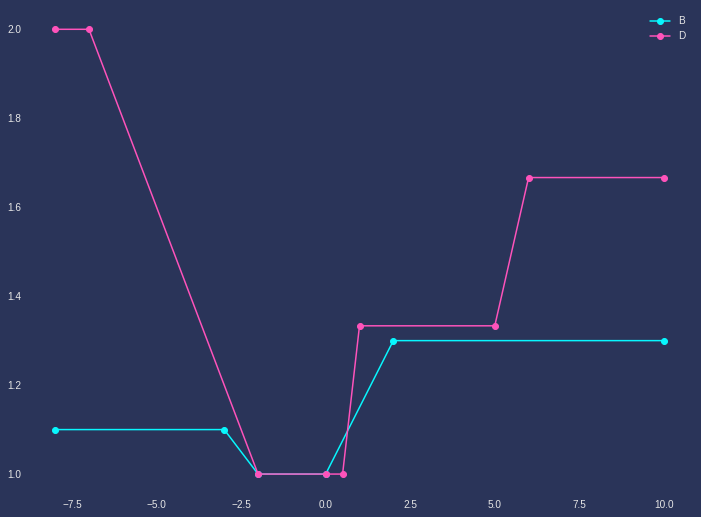

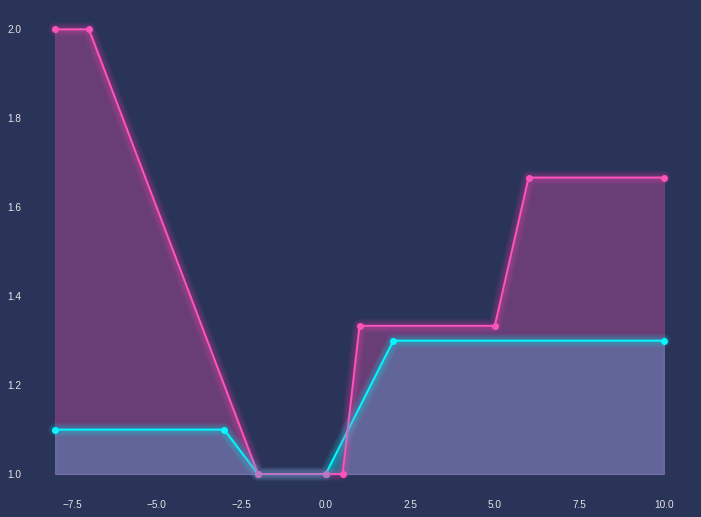

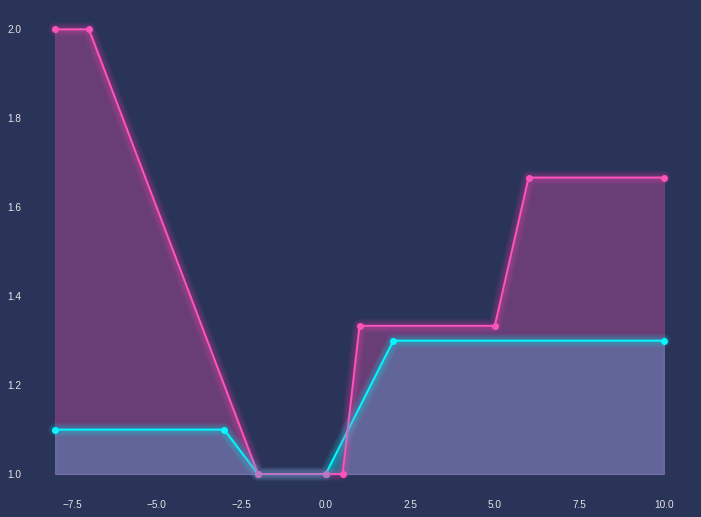

In [32]:
### -- NEON STYLE -- ### 

# Parameters
draws = 10 # How many times to draw the line
diff_linewidth = 1.05 # Different line widths each draw
alpha_value = 0.03 # Alpha values of glow effect
glow_size = 5 # Glow linewidth
colors = [
    '#08F7FE',  # teal/cyan
    '#FE53BB',  # pink
    '#F5D300',  # yellow
    '#00ff41', # matrix green
]

timeB, creatB = dummypatients['B'][0], dummypatients['B'][1]
timeD, creatD = dummypatients['D'][0], dummypatients['D'][1]

# Style alone:
fig, ax = plt.subplots(figsize=(12,9))
ax.plot(timeB, creatB, color=colors[0], label='B', marker='o')
ax.plot(timeD, creatD, color=colors[1], label='D', marker='o')
ax.legend()

# Seaborn parameters
plt.style.use("seaborn-dark")
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#2A3459'  # bluish dark grey
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
ax.grid(color='#212946')  # bluish dark grey, but slightly lighter than background
ax.set_facecolor(color='#2A3459')

# Styling alone:
fig, ax = plt.subplots(figsize=(12,9))
ax.plot(timeB, creatB, color=colors[0], label='B', marker='o')
ax.plot(timeD, creatD, color=colors[1], label='D', marker='o')
ax.legend()

fig, ax = plt.subplots(figsize=(12,9))
ax.plot(timeB, creatB, alpha = 1.0, linewidth=2.0, color = colors[0], marker = 'o') # Plot the lines
ax.plot(timeD, creatD, alpha = 1.0, linewidth=2.0, color = colors[1], marker = 'o')
for n in range(draws): # Coat the lines in "glow" by drawing n lines around it

    ax.plot(timeB, creatB, color = colors[0],
            linewidth=glow_size+(diff_linewidth*n),
            alpha=alpha_value)
            
    ax.plot(timeD, creatD, color = colors[1],
            linewidth=glow_size+(diff_linewidth*n),
            alpha=alpha_value)

ax.fill_between(timeB, creatB, 1, color=colors[0], alpha = 0.3)
ax.fill_between(timeD, creatD, 1, color=colors[1], alpha = 0.3)


plt.show()

## How to create glowing neon effect in Python


# Glowing is really just dimishing the brightness/transparence outwards from the line


## PREVIOUS METHOD (PLAIN) ##
ax.plot(timeB, creatB)
ax.set_xlabel('time (days)')
ax.set_ylabel('creatinine (mg/dL)')
ax.set_title('Patient B')
ax.fill_between(timeB, creatB, 1, color='lightblue')

# Darker style works well with neon blend
plt.style.use("seaborn-dark")
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#2A3459'  # bluish dark grey
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
ax.grid(color='#212946')  # bluish dark grey, but slightly lighter than background
ax.set_facecolor(color='#2A3459')

# Neon effect:
draws = 10 # How many times to draw the line
diff_linewidth = 1.05 # Different line widths each draw
alpha_value = 0.03 # Alpha values of glow effect
glow_size = 5 # Glow linewidth

fig, ax = plt.subplots(figsize=(12,9))
ax.plot(timeB, creatB, alpha = 1.0, linewidth=2.0, color = colors[0], marker = 'o') # Plot the lines
ax.plot(timeD, creatD, alpha = 1.0, linewidth=2.0, color = colors[1], marker = 'o')
for n in range(draws): # Coat the lines in "glow" by drawing n lines around it

    ax.plot(timeB, creatB, color = colors[0],
            linewidth=glow_size+(diff_linewidth*n),
            alpha=alpha_value)
            
    ax.plot(timeD, creatD, color = colors[1],
            linewidth=glow_size+(diff_linewidth*n),
            alpha=alpha_value)

ax.fill_between(timeB, creatB, 1, color=colors[0], alpha = 0.3)
ax.fill_between(timeD, creatD, 1, color=colors[1], alpha = 0.3)


plt.show()